# Create Database for our project

-Because the files we will be using for the Capstone project are very large (over 5GB) for excel to handle, we will build an sqlite DB to handle the dataset.

In [161]:
import numpy as np
import sqlite3
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
db = "liquor.db"

In [ ]:
conn = sqlite3.connect(db)
c = conn.cursor()

In [ ]:
#We try to open the headers and first three lines of the file to see how it looks like, we used for loop to read the file 
#line by line

counter = 0
with open ("Iowa_Liquor_Sales.csv") as infile:
    for line in infile:
        if (counter >= 0):
            print (line)
        if counter == 3:
            break
        counter += 1

In [ ]:
#We do the same thing for "Iowa_Liquor_Products.csv"

counter = 0
with open ("Iowa_Liquor_Products.csv") as infile:
    for line in infile:
        if (counter >= 0):
            print (line)
        if counter == 3:
            break
        counter += 1

# Change of Strategy
-We decided to work with Google Bigquery to handle the data because we found Iowa Liquor Sales is actually a public dataset that is hosted within Google Bigquery, making out job easier\
-We use the following command lines to enable BigQuery API:\
#gcloud services list #Lists the APIs that are enabled already
#gcloud services enable bigquery.googleapis.com \
#To enable BQ API

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [47]:
#Set environment variables for our notebook
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'liquor-store-sale-capstone.json'
#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
bigquery_client = bigquery.Client()
#Write Query on BQ (in this case we retrieve data within the 2018-01-01 to 2018-12-31 timeframe and focus on the Hy-Vee 
#store, as we found in our initial data analysis that Hy-Vee sold the most liquors over the years in Iowa)
QUERY = """
SELECT
  *
FROM 
  `liquor-store-sale-capstone.liquor_store_sales.2018_Iowa_Liquor_Sale1`
LIMIT 10000

  """
#Run the query and write result to a pandas data frame
Query_Results = bigquery_client.query(QUERY)
df = Query_Results.to_dataframe()
#View top few rows of result
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,store_location_formatted
0,INV-14968800001,2018-10-10,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402,POINT (-91.63913 42.04671),57,LINN,...,Glenmorangie Taster Pack,6,100,14.99,22.49,2,44.98,0.20,0.05,-91.63913 42.04671
1,INV-14815500001,2018-10-03,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402,POINT (-91.63913 42.04671),57,LINN,...,Glenmorangie Taster Pack,6,100,14.99,22.49,1,22.49,0.10,0.02,-91.63913 42.04671
2,INV-14390900001,2018-09-12,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402,POINT (-91.63913 42.04671),57,LINN,...,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,6,162.00,10.50,2.77,-91.63913 42.04671
3,INV-15407800001,2018-10-31,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402.0,POINT (-91.63913 42.04671),57,LINN,...,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,6,162.00,10.50,2.77,-91.63913 42.04671
4,INV-14968800002,2018-10-10,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402,POINT (-91.63913 42.04671),57,LINN,...,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,1,27.00,1.75,0.46,-91.63913 42.04671
5,INV-11993400001,2018-05-09,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402.0,POINT (-91.63913 42.04671),57,LINN,...,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,12,324.00,21.00,5.55,-91.63913 42.04671
6,INV-10915200001,2018-03-14,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402.0,POINT (-91.63913 42.04671),57,LINN,...,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,6,162.00,10.50,2.77,-91.63913 42.04671
7,INV-15567100022,2018-11-07,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402.0,POINT (-91.63913 42.04671),57,LINN,...,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,48,1296.00,84.00,22.19,-91.63913 42.04671
8,INV-09708200001,2018-01-10,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402.0,POINT (-91.63913 42.04671),57,LINN,...,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,6,162.00,10.50,2.77,-91.63913 42.04671
9,INV-16593100001,2018-12-27,2618,Hy-Vee Drugstore #6 / Cedar Rapids,505 Boyson Rd NE,Cedar Rapids,52402.0,POINT (-91.63913 42.04671),57,LINN,...,Captain Morgan Spiced Barrel,6,1750,18.00,27.00,6,162.00,10.50,2.77,-91.63913 42.04671


Desktop/NYC Data Science Adademy/Projects/Capstone Projects files

In [50]:
df.groupby(['invoice_and_item_number'])['item_number'].nunique().value_counts()

1    10
Name: item_number, dtype: int64

In [ ]:
import copy
liquor=copy.deepcopy(df)

In [ ]:
#drop columns that are not usful for the purpose of our analysis/project
liquor.drop(['invoice_and_item_number','item_number','county_number','category','volume_sold_liters'],axis=1,inplace=True)

In [ ]:
liquor.head()

# EDA Analysis

In order to analyze the dataset, we first need to look at unit profit per sale/bottle. Therefore, we generate new features

In [ ]:
def find_location(df):
    
    '''
    
    Finding location coordinates for all columns that are missing values for location.
    
    df arguement that will be passed to the function is already the filtered dataframe
    that contains the observations with null values to minimize amount of API requests.
    
    '''

    for i, j in df.iterrows():
        location = str(df.at[i,'address']) + ',' + str(df.at[i,'zip_code']) + ',' + str(df.at[i,'city'])+', United States' 

        params = {

            "key": key,
            "location": location
        }


        response = requests.get('http://www.mapquestapi.com/geocoding/v1/address', params=params)

        
        data = json.loads(response.text)

        lat = data['results'][0]['locations'][0]['latLng']['lat']
        long = data['results'][0]['locations'][0]['latLng']['lng']

        df.at[i,'long'] = long
        df.at[i,'lat'] = lat
        
    return df

In [ ]:
#Create profit_per_liter column for easy unit profit caomparison
liquor['profit_per_bottle']=liquor['state_bottle_retail']-liquor['state_bottle_cost']
liquor['profit_per_sale']=liquor['profit_per_bottle']*liquor['bottles_sold']

In [ ]:
#drop store_location column as it contains string characters 'POINT' besides coordinates, and update store_location_
#formatted column(The column is updated version of store_location column as took out 'POINT' and removed brackets in Google 
#Big Query) to get it ready for location analysis

liquor.drop(['store_location'],axis= 1,inplace= True)

In [ ]:
#get rid of space at the beginning of each cell in store_location_formatted column
liquor['store_location_formatted']=liquor['store_location_formatted'].apply(lambda x: x[1:])
liquor['store_location_formatted']=liquor['store_location_formatted'].apply(lambda x: x.strip())

In [ ]:
liquor['store_location_formatted'].head()

In [ ]:
#set the store_location_formatted column into coordinate format
import re
# for i in range(len(liquor['store_location_formatted'])):
#     liquor['store_location_formatted'][i]=re.sub("\s+",",",liquor['store_location_formatted'][i])
liquor['store_location_formatted']=liquor['store_location_formatted'].apply(lambda x: re.sub("\s+",",",x))

In [ ]:
#Convert date to datetime type
liquor['date']=pd.to_datetime(liquor['date'])

In [ ]:
#Extract month of each sale
liquor['month']=pd.DatetimeIndex(liquor['date']).month

In [ ]:
#Extract monthly total sales data
date_analysis=liquor.groupby(['month'])['sale_dollars'].sum()

In [ ]:
#Draw monthly total sales line chart
import plotly.express as px
fig=px.line(x=date_analysis.index,y=date_analysis,title='Hy-Vee Liquor Sales in Iowa')
fig.update_layout(xaxis_title='Month',yaxis_title='Sales Revenue in US Dollars')
fig.show()

In [ ]:
#Draw per bottle profit distribution plot
liquor.hist('profit_per_bottle',bins=120,range=[0,20])

In [ ]:
import folium
from IPython.display import display
from folium.plugins import HeatMap
# from folium import plugins
# #import rioxarray as rxr
# import earthpy as et
# import earthpy.spatial as es

# Heatmap 

In [ ]:
#add a new coordinates column by updating the original store_location_formatted column to get ready for map:
liquor['coordinates']=liquor['store_location_formatted'].apply(lambda x: list(x.split(',')))

In [ ]:
liquor['coordinates'].head()

In [ ]:
#reverse the order for folium map format (latitude first and longitude second)
for i in range(liquor.shape[0]):
     liquor['coordinates'][i].reverse()

In [ ]:
#build an initial map for Iowa
map=folium.Map(liquor['coordinates'][0])
map

In [ ]:
#import coordinates for heatmap
heatmap=HeatMap(liquor['coordinates'])

In [ ]:
map.add_child(heatmap)

# Time Series Analysis
### For time Series, we look at hourly, daily, and monthly

In [ ]:
#First we want to look at different liquor types. Seems like both 'item_descrption' and 'category_name' describe the type.
#We look at both of them
len(liquor['item_description'].unique()), len(liquor['category_name'].unique())                

In [ ]:
#From above we can tell category_name column helps us group the liquor types better
liquor['category_name'].value_counts()

In [ ]:
#liquor.to_gbq('liquor_store_sales.2018_Iowa_Liquor_Sale2','liquor-store-sale-capstone',if_exists='append')

In [ ]:
# from datalab.context import Context
# import google.datalab.storage as storage

In [ ]:
#Remove rows for which the category_name column value is null
liquor=liquor.dropna(subset=['category_name'])

In [ ]:
#change the category_name column to lowercase before we extract the liquor type
liquor['category_name']=liquor['category_name'].str.lower()

In [ ]:
#Categorize the liquor types for the category_name column
liquor['liquor_type'] = np.where(liquor['category_name'].str.contains('rum'),'rum',
                                    np.where(liquor['category_name'].str.contains('gin'),'gin', 
                                    np.where(liquor['category_name'].str.contains('brandy|brandies'), 'brandy',
                                    np.where(liquor['category_name'].str.contains('whisk|bourbon|scotch'), 'whisky',
                                    np.where(liquor['category_name'].str.contains('tequila|mezcal'), 'tequila',
                                    np.where(liquor['category_name'].str.contains('schnapps'), 'schnapps',
                                    np.where(liquor['category_name'].str.contains('vodka'), 'vodka',
                                    np.where(liquor['category_name'].str.contains('liqueur'), 'liqueur','other'))))))))

In [ ]:
liquor['liquor_type'].value_counts()

In [ ]:
#initial groupby(panel data) for time series analysis
liquor.groupby(['date','liquor_type'])['profit_per_bottle'].mean().unstack('date')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Extract the day info
liquor['day']=liquor['date'].dt.dayofyear

In [ ]:
liquor.columns #see which columns will be helpful besides profit_per_bottle

In [ ]:
sale_by_day=pd.DataFrame(liquor.groupby(['day'])['sale_dollars'].sum())

In [ ]:
plt.figure(figsize=(16,5),dpi=100)
plt.plot(sale_by_day.index,'sale_dollars',data=sale_by_day,color='tab:red')
plt.gca().set(title='daily liquor sales at Hy-Vees in Iowa of 2018',xlabel='Day',ylabel='Sales in US Dollars')
plt.show()

# Import data from 2012 until 2022 to do some real time series including seasonal plot:


In [1]:
#Set environment variables for our notebook
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'bigqueryliquor.json'
#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
bigquery_client = bigquery.Client()
#Write Query on BQ (in this case we retrieve data within the 2018-01-01 to 2018-12-31 timeframe and focus on the Hy-Vee 
#store, as we found in our initial data analysis that Hy-Vee sold the most liquors over the years in Iowa)
QUERY = """
SELECT
  *
FROM 
  `liquor-store-sale-capstone.liquor_store_sales.Iowa_Hy-Vee_Liquor_Sale_Beg2012_NoNull`
ORDER BY RAND()
LIMIT 100000
  """
#Run the query and write result to a pandas data frame
Query_Results = bigquery_client.query(QUERY)
df_time_series = Query_Results.to_dataframe()

In [2]:
#In order for easy data processing, all the preprocessing processes above have been streamlined into 'dataprocessing.py'
# %load_ext autoreload
# %autoreload 2
from dataprocessing import preprocessing

In [3]:
#streamlined preprocessing data
import warnings
warnings.filterwarnings('ignore')
df_time_series = preprocessing(df_time_series)

In [4]:
#create dataframe for plot
year_month=df_time_series.groupby(['year','month'])['sale_dollars'].apply(sum).reset_index()

In [5]:
year_month['month'].value_counts()

1     11
2     11
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
Name: month, dtype: int64

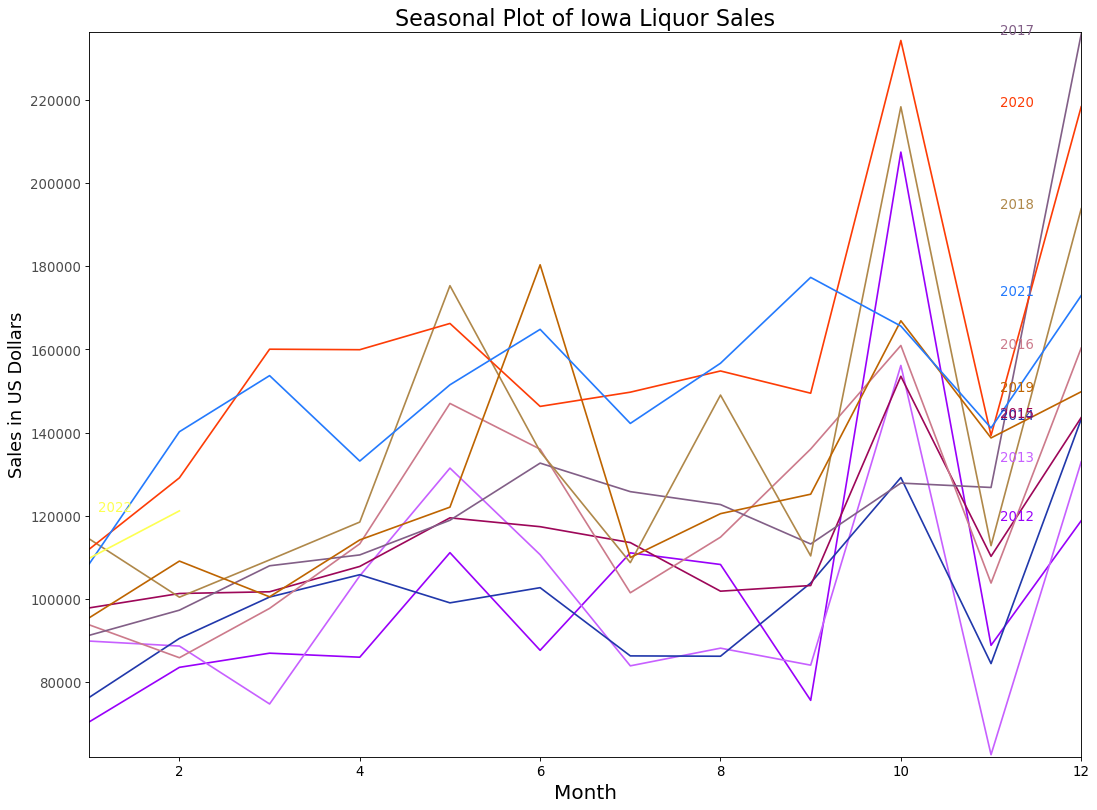

In [6]:
#Draw different year sales plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

#prep colors
np.random.seed(100)
years=year_month['year'].unique()
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('month', 'sale_dollars', data=year_month.loc[year_month.year==y,:], color=mycolors[i], label=y)
        plt.text(year_month.loc[year_month.year==y, :].shape[0]-.9, year_month.loc[year_month.year==y, 'sale_dollars'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(1, 12), ylim=(min(year_month['sale_dollars'])-500, max(year_month['sale_dollars'])+500))
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12)
plt.title("Seasonal Plot of Iowa Liquor Sales", fontsize=20)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Sales in US Dollars',fontsize=16)
plt.show()

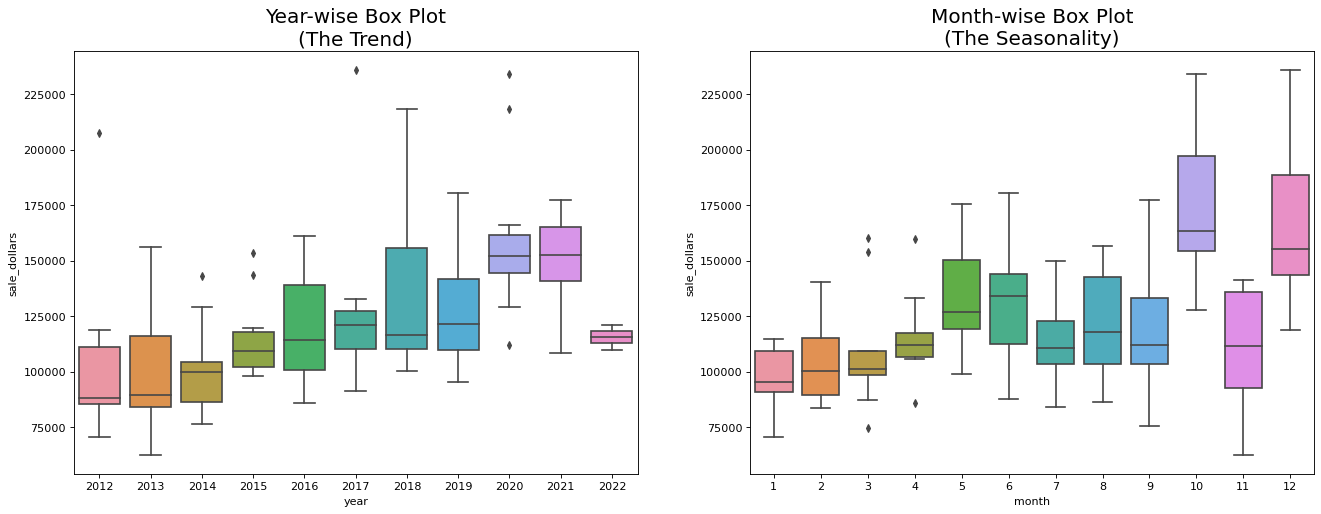

In [7]:
#Seasonal box plot
import seaborn as sns

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='sale_dollars', data=year_month, ax=axes[0])
sns.boxplot(x='month', y='sale_dollars', data=year_month)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

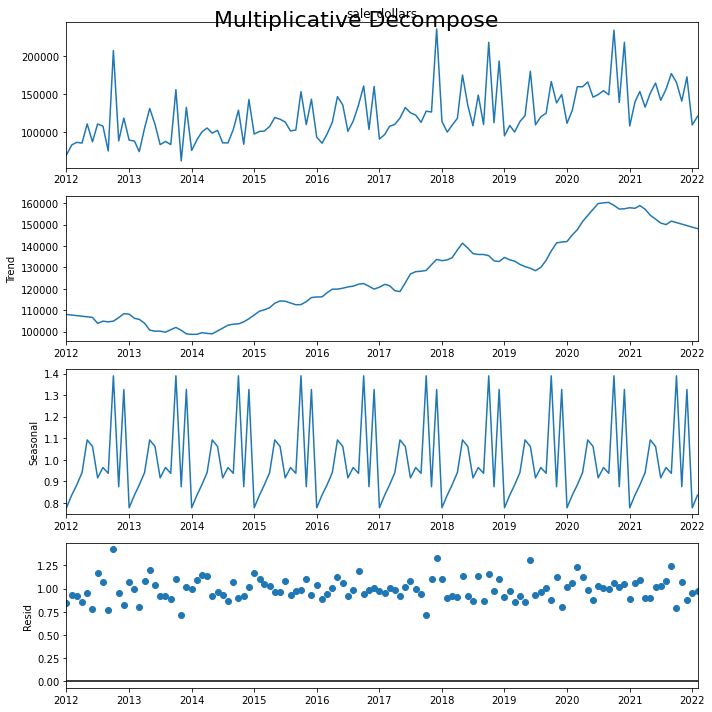

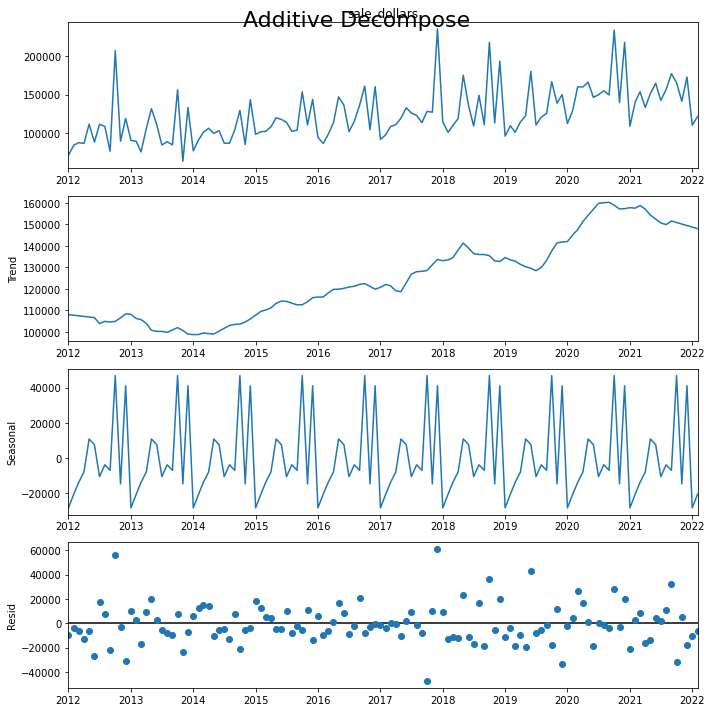

In [8]:
#Decomposition of a time series into its components
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
# Multiplicative Decomposition 
#date = df_time_series.groupby(['date'])['sale_dollars'].apply(sum).reset_index()
#date['date']=pd.to_datetime(date['date'])
#date = date.set_index('date').sort_index()
year_month['day']=1
year_month['date']=pd.to_datetime(year_month[['year','month','day']])
date=year_month.set_index('date').sort_index()
date=date.drop(['year','month','day'],axis=1)
result_mul = seasonal_decompose(date['sale_dollars'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(date['sale_dollars'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [9]:
#Making the time series starionary in order for easier forecasting and better reliability, especially for autoregressive 
#forecasting as it is esstially linear regression that utilizes the lag(s) of the series itself as predictors. 
#Stationarizing solves the collineariry problem of predictors by removing autocorrelation and making them independent.

#First we check if our series is stationary or not
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
# result = adfuller(date['sale_dollars'])
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')
# for key, value in result[4].items():
#     print('Critial Values:')
#     print(f'   {key}, {value}')
    
def adfuller_test(df_value):
    results = adfuller(df_value)
    labels = ['ADF Test Statistic','p-value','Num lags used','Num Observations Used']
    for value,label in zip(results,labels):
        print(label+': '+str(value))
    if results[1]<= 0.05:
        print('Rejecting null hypothesis, data is stationary')
    else:
        print('Accept null hypothesis, data is non-stationary, further process needed to make data stationary')

adfuller_test(date['sale_dollars'])

ADF Test Statistic: -0.5568407460719653
p-value: 0.8804391238234048
Num lags used: 11
Num Observations Used: 110
Accept null hypothesis, data is non-stationary, further process needed to make data stationary


In [10]:
# # KPSS Test
# result = kpss(date['sale_dollars'])
# print('\nKPSS Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# for key, value in result[3].items():
#     print('Critial Values:')
#     print(f'   {key}, {value}')

def KPSS_test(df_value):
    results = kpss(df_value)
    labels = ['KPSS Test Statistic','p-value','Num lags used','Critial values']
    for value,label in zip(results,labels):
        print(label+': '+str(value))
    if results[1]<= 0.05:
        print('Rejecting null hypothesis, data is non-stationary, further process needed to make data stationary')
    else:
        print('Accept null hypothesis, data is stationary')

KPSS_test(date['sale_dollars'])

KPSS Test Statistic: 1.7277328567919605
p-value: 0.01
Num lags used: 5
Critial values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Rejecting null hypothesis, data is non-stationary, further process needed to make data stationary


C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [11]:
#For ADF test result above, we can tell the p-value if less than 0.05, where we would reject the null hypothesis that
#the time series possesses a unit root-the model is non-stationary. Therefore, the model is stationary. (KPSS is 
#the opposite of ADF test)

In [11]:
#Differencing if the data is not stationary
def data_diff(df,col):
    df['regular_diff']=df[col]-df[col].shift(1)
    df['seasonal_diff']=df[col]-df[col].shift(12)
    return df

In [12]:
data_diff(date,'sale_dollars')

,sale_dollars,regular_diff,seasonal_diff
date,,,
2012-01-01,70452.16,NaN,NaN
2012-02-01,83568.82,13116.66,NaN
2012-03-01,86972.45,3403.63,NaN
2012-04-01,86004.55,-967.90,NaN
2012-05-01,111144.01,25139.46,NaN
...,...,...,...
2021-10-01,165628.45,-11704.51,-68672.02
2021-11-01,141123.53,-24504.92,1810.69
2021-12-01,172964.88,31841.35,-45408.82


In [13]:
#see if data is stationary after diff so we could use ARIMA model to predict
adfuller_test(date['regular_diff'].dropna()), adfuller_test(date['seasonal_diff'].dropna())

ADF Test Statistic: -7.711192459697859
p-value: 1.2625581321173689e-11
Num lags used: 10
Num Observations Used: 110
Rejecting null hypothesis, data is stationary
ADF Test Statistic: -5.012956534020744
p-value: 2.0919428276023346e-05
Num lags used: 13
Num Observations Used: 96
Rejecting null hypothesis, data is stationary


(None, None)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

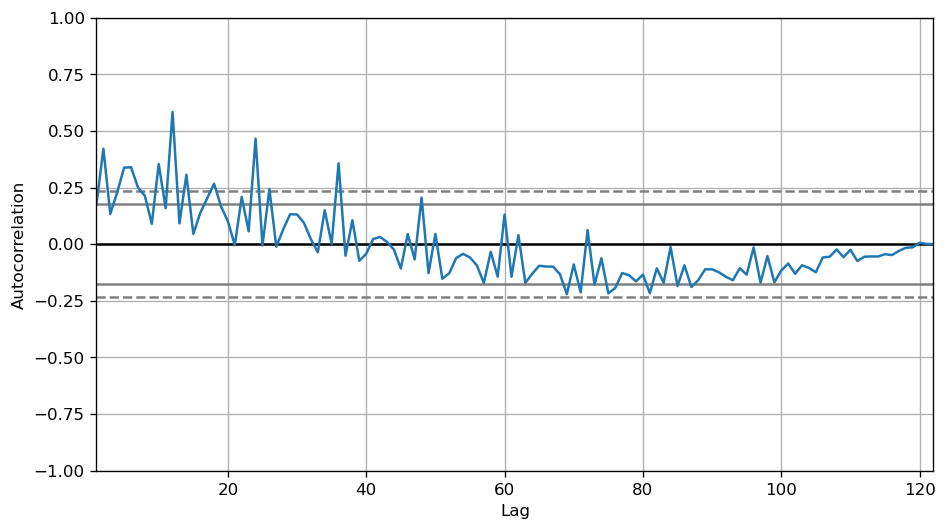

In [14]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(date['sale_dollars'])

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
acf(date['regular_diff'].dropna(), nlags=50), pacf(date['regular_diff'].dropna(), nlags=50)

(array([ 1.        , -0.65448972,  0.3290455 , -0.23578737, -0.00225961,
         0.06018854,  0.06101501, -0.03282889,  0.04539534, -0.20676895,
         0.25312425, -0.37313471,  0.55599553, -0.4347284 ,  0.29019232,
        -0.21092917,  0.02387409, -0.00587484,  0.09408029, -0.01879247,
         0.02233195, -0.17841202,  0.20187201, -0.3279693 ,  0.52697909,
        -0.43954527,  0.31211252, -0.20232584,  0.00456484,  0.04196614,
         0.01807318,  0.02137795, -0.00378485, -0.14450087,  0.19481419,
        -0.29668305,  0.45876183, -0.3456042 ,  0.20669798, -0.12880515,
        -0.01663062,  0.03253355,  0.01834854,  0.00407328,  0.03116476,
        -0.13233327,  0.15060175, -0.22800862,  0.36011218, -0.31241906,
         0.23172478]),
 array([ 1.00000000e+00, -6.59943799e-01, -1.78839246e-01, -1.82124916e-01,
        -3.99893982e-01, -3.20623294e-01, -3.50170836e-02, -1.31147074e-02,
         3.67783813e-02, -2.53263613e-01,  3.28527681e-02, -4.79278643e-01,
         8.55439567

<function matplotlib.pyplot.close(fig=None)>

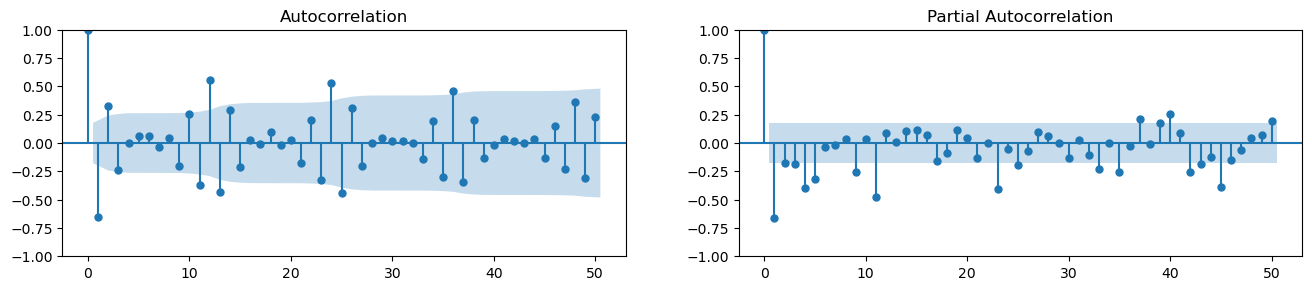

In [16]:
#Because our data is stationary, we don't have to do the diff to get reg diff and seasonal diff. Therefore, we could just 
#draw ACF and PACF plot using our original data, otherwise, if we do the diff, we will need to use the seasonal diff data.

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(date['regular_diff'].dropna(), lags=50, ax=axes[0]) #for MA part of ARIMA
plot_pacf(date['regular_diff'].dropna(), lags=50, ax=axes[1]) #for AR part of ARIMA
plt.close

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

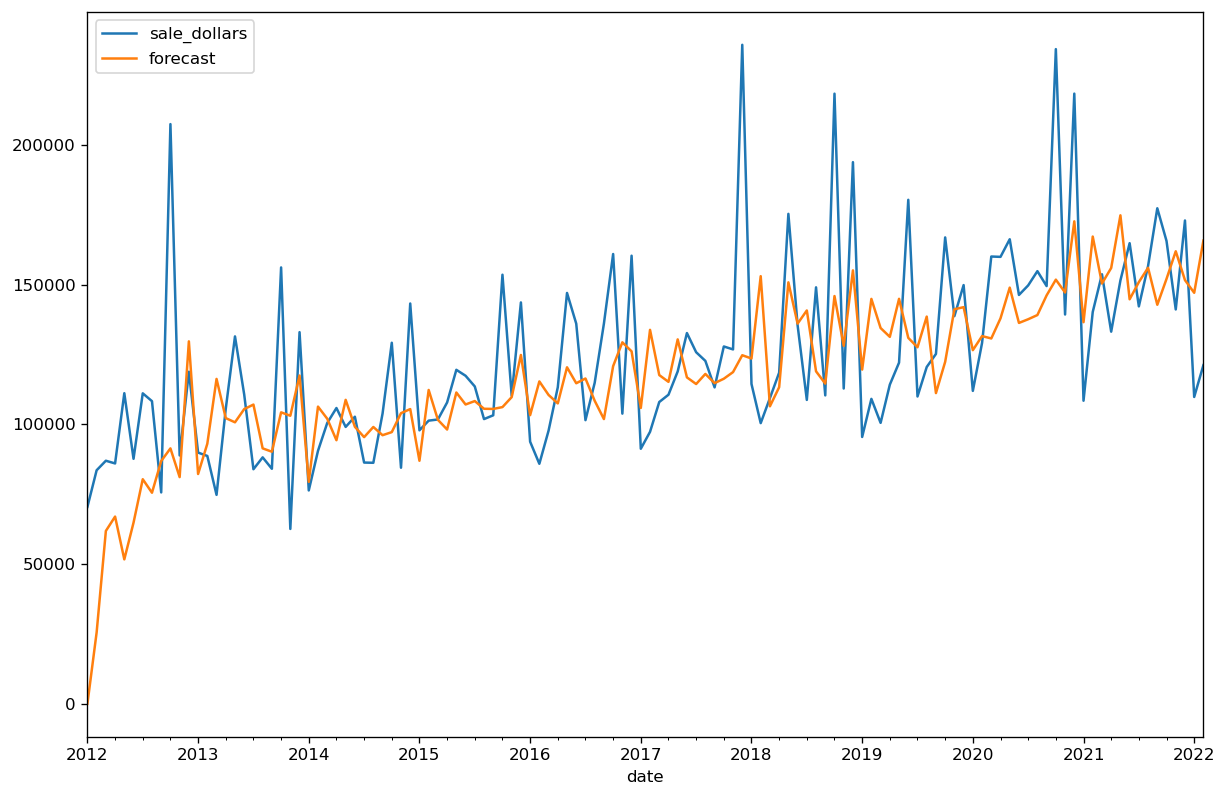

In [25]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(date['sale_dollars'],order=(5,1,2))
date['forecast']=model.fit().predict()
date[['sale_dollars','forecast']].plot(figsize=(12,8))

<function matplotlib.pyplot.close(fig=None)>

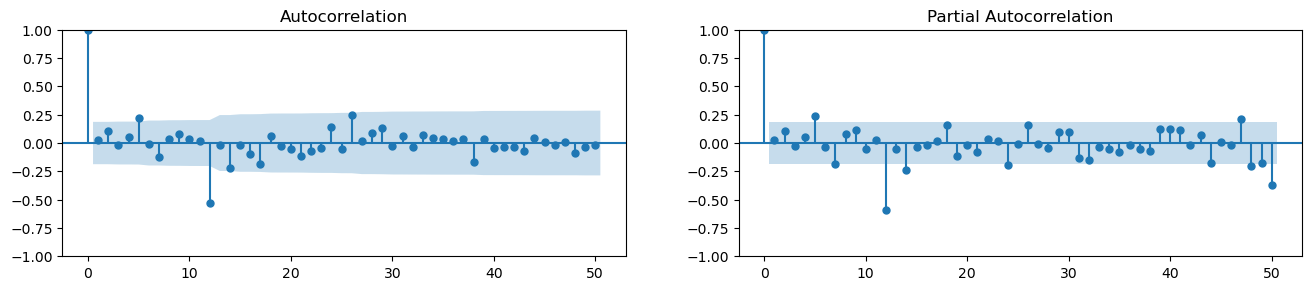

In [18]:
#Now we look at seasonal ACF and PACF plots
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(date['seasonal_diff'].dropna(), lags=50, ax=axes[0]) #for MA part of ARIMA
plot_pacf(date['seasonal_diff'].dropna(), lags=50, ax=axes[1]) #for AR part of ARIMA
plt.close

In [20]:
#And we use SARIMAX model to forecast and predict sales
import statsmodels.api as sm

In [28]:
model=sm.tsa.statespace.SARIMAX(date['sale_dollars'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

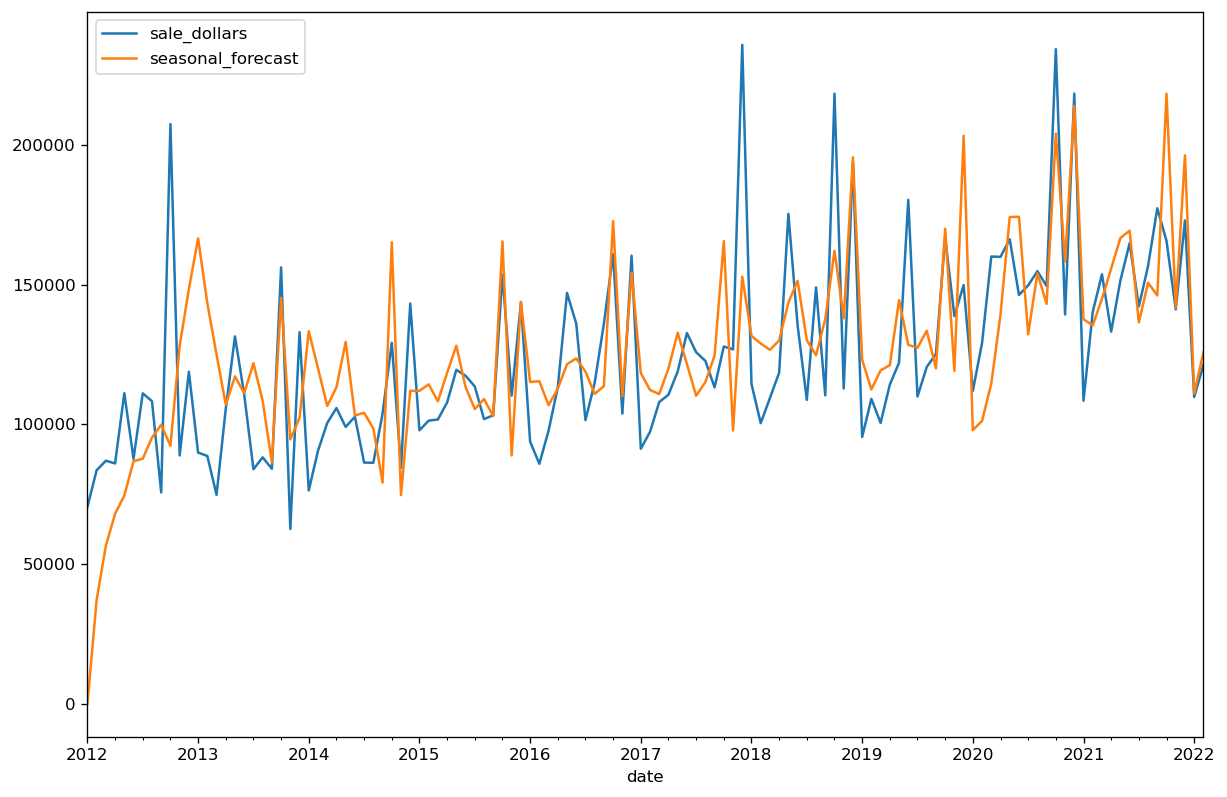

In [29]:
date['seasonal_forecast']=results.predict()
date[['sale_dollars','seasonal_forecast']].plot(figsize=(12,8))

In [27]:
#Now we predict future using our model

In [39]:
from pandas.tseries.offsets import DateOffset

In [40]:
future_dates=[date.index[-1]+ DateOffset(months=x)for x in range(0,24)]  #We will prefict the next 2 years (24 months)
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=date.columns)
future_df=pd.concat([date,future_datest_df])

In [43]:
#Now we find where we should draw the prediction plot
date,future_df

(            sale_dollars  regular_diff  seasonal_diff
 date                                                 
 2012-01-01      74595.90           NaN            NaN
 2012-02-01      91147.87      16551.97            NaN
 2012-03-01      79545.44     -11602.43            NaN
 2012-04-01      76560.76      -2984.68            NaN
 2012-05-01     101545.45      24984.69            NaN
 ...                  ...           ...            ...
 2021-10-01     165126.15      29419.89       14590.80
 2021-11-01     138141.74     -26984.41        -328.32
 2021-12-01     177948.74      39807.00       10133.54
 2022-01-01     121490.27     -56458.47      -13788.03
 2022-02-01     147573.34      26083.07       32681.19
 
 [122 rows x 3 columns],
            sale_dollars regular_diff seasonal_diff
 2012-01-01      74595.9          NaN           NaN
 2012-02-01     91147.87     16551.97           NaN
 2012-03-01     79545.44    -11602.43           NaN
 2012-04-01     76560.76     -2984.68           Na

In [ ]:
future_df['forecast'] = results.predict(start = 122, end = 144, dynamic= False)  
future_df[['sales_dollars', 'forecast']].plot(figsize=(12, 8)) 